In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
Graphtype = nx.DiGraph()
filepath = 'drive/MyDrive/BAJAJ/GNN_datasets/amazon0601.txt' #reading transaction data
G = nx.read_edgelist(
    filepath,
    comments='#',
     
    create_using=Graphtype,
    nodetype=int
)

In [ ]:
df = pd.read_csv('drive/MyDrive/BAJAJ/GNN_datasets/pdssimilar.csv') #reading metadata

In [ ]:
df.head()

,Id,Title,Categories,Group,Copurchased,SalesRank,TotalReviews,AvgRating,NoSim,ASIN
0,0,NaN,NaN,NaN,NaN,0,0,0.0,5,0771044445
1,1,Patterns of Preaching: A Sermon Sampler,christian spiritu religion clergi preach book ...,Book,0804215715 156101074X 0687023955 0687074231 08...,396585,2,5.0,5,0827229534
2,2,Candlemas: Feast of Flames,spiritu religion earth witchcraft book wicca b...,Book,0738700827 1567184960 1567182836 0738700525 07...,168596,12,4.5,5,0738700797
3,3,World War II Allied Fighter Planes Trading Cards,hobbi garden craft general home book subject,Book,NaN,1270652,1,5.0,0,0486287785
4,4,Life Application Bible Commentary: 1 and 2 Tim...,spiritu sacr applic book refer religion guid d...,Book,0842328130 0842330313 0842328610 0842328572,631289,1,4.0,5,0842328327


In [ ]:
df.isnull().sum()

Id                   0
Title             5868
Categories       28771
Group             5868
Copurchased     186985
SalesRank            0
TotalReviews         0
AvgRating            0
NoSim                0
ASIN                 0
dtype: int64

In [ ]:
df.shape

(548552, 10)

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Id              0
Title           0
Categories      0
Group           0
Copurchased     0
SalesRank       0
TotalReviews    0
AvgRating       0
NoSim           0
ASIN            0
dtype: int64

In [ ]:
df['NoSim'].value_counts()

5    323409
3      8811
4      8523
2      8262
1      6165
Name: NoSim, dtype: int64

In [ ]:
df.head()

,Id,Title,Categories,Group,Copurchased,SalesRank,TotalReviews,AvgRating,NoSim,ASIN
1,1,Patterns of Preaching: A Sermon Sampler,christian spiritu religion clergi preach book ...,Book,0804215715 156101074X 0687023955 0687074231 08...,396585,2,5.0,5,0827229534
2,2,Candlemas: Feast of Flames,spiritu religion earth witchcraft book wicca b...,Book,0738700827 1567184960 1567182836 0738700525 07...,168596,12,4.5,5,0738700797
4,4,Life Application Bible Commentary: 1 and 2 Tim...,spiritu sacr applic book refer religion guid d...,Book,0842328130 0842330313 0842328610 0842328572,631289,1,4.0,5,0842328327
5,5,Prayers That Avail Much for Business: Executive,christian spiritu worship religion devot live ...,Book,157794349X 0892749504 1577941829 0892749563,455160,0,0.0,5,1577943082
6,6,How the Other Half Lives: Studies Among the Te...,unit categori photo photographi nonfict scienc...,Book,0486401960 0452283612 0486229076 0714840343,188784,17,4.0,5,0486220125


In [ ]:
df.columns

Index(['Id', 'Title', 'Categories', 'Group', 'Copurchased', 'SalesRank',
       'TotalReviews', 'AvgRating', 'NoSim', 'ASIN'],
      dtype='object')

In [ ]:
nodeattrdf = df[['Title','ASIN' ,'Categories', 'Group', 'Copurchased', 'SalesRank','TotalReviews', 'AvgRating', 'NoSim']].copy()

In [ ]:
nx.set_node_attributes(G, nodeattrdf.to_dict('index'))

In [ ]:
G.nodes[2]

{'ASIN': '0738700797',
 'AvgRating': 4.5,
 'Categories': 'spiritu religion earth witchcraft book wicca base subject',
 'Copurchased': '0738700827 1567184960 1567182836 0738700525 0738700940',
 'Group': 'Book',
 'NoSim': 5,
 'SalesRank': 168596,
 'Title': 'Candlemas: Feast of Flames',
 'TotalReviews': 12}

In [ ]:
remove = [nodes for nodes in dict(G.nodes()) if len(G.nodes[nodes]) == 0] #removing nodes with no links

In [ ]:
G.remove_nodes_from(remove)

In [ ]:
remove[:10]

[0, 3, 9, 234, 47, 355, 44, 4954, 36, 58]

In [ ]:
G.number_of_nodes()

258127

In [ ]:
n = list(G.nodes) #array of permissible nodes
n =  np.array(n)
n = np.unique(n)

In [ ]:
tempinput = int(input()) #taking input that is allowed
if(tempinput in n):
  pro_id = tempinput
  print("Selected product is", pro_id)
else:
  print("Empty node has been removed from the graph!")

3
Empty node has been removed from the graph!


In [ ]:
pro_dict = G.nodes[pro_id]

In [ ]:
pro_dict #details of the product selected by the user

{'ASIN': '0312199406',
 'AvgRating': 3.5,
 'Categories': 'fiction club general subject book contemporari popular literatur store specialti',
 'Copurchased': '0312267568 0312316089 0312099436 0312144075 0446674346',
 'Group': 'Book',
 'NoSim': 5,
 'SalesRank': 57186,
 'Title': 'Night of Many Dreams : A Novel',
 'TotalReviews': 22}

In [ ]:
arr = pro_dict['Copurchased']

In [ ]:
arr = arr.split(' ')

In [ ]:
len(arr)

5

In [ ]:
arr = np.array(arr)

In [ ]:
arr #list of the ASINs of the products that are similar to the product selected

array(['0312267568', '0312316089', '0312099436', '0312144075',
       '0446674346'], dtype='<U10')

In [ ]:
def getsimilar(arr):
  indarr = []
  counter = 0
  for i in arr:
    indx = df.index[df['ASIN'] == i][0]
    if(indx in n):
      print(G.nodes[indx])
      indarr.append(indx)
    else:
      counter = counter+1
  return counter, indarr
    
    

In [ ]:
counter, indarr = getsimilar(arr)

{'Title': 'The Language of Threads: A Novel', 'ASIN': '0312267568', 'Categories': 'fiction histor genr club general subject book popular literatur literari store specialti', 'Group': 'Book', 'Copurchased': '0312099436 0312199406 0312316089 0312144075 0446674346', 'SalesRank': 18745, 'TotalReviews': 24, 'AvgRating': 4.0, 'NoSim': 5}
{'Title': 'Cloud Mountain', 'ASIN': '0446674346', 'Categories': 'fiction histor genr general book contemporari literatur literari subject', 'Group': 'Book', 'Copurchased': '0312316089 0312099436 0312267568 0312144075', 'SalesRank': 233462, 'TotalReviews': 19, 'AvgRating': 4.0, 'NoSim': 5}


In [ ]:
indarr

[150250, 301347]

In [ ]:
print(counter,"nodes have been removed from the graph")

3 nodes have been removed from the graph


In [ ]:
disparr = np.append(indarr, pro_id)

In [ ]:
H = G.subgraph(disparr)

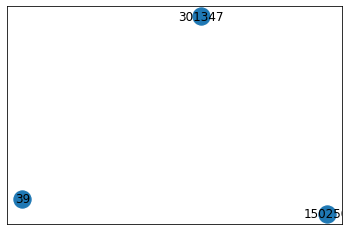

In [ ]:
nx.draw_networkx(H, with_labels = True,edge_color = 'r')